# DATA MINING

## Kelompok 4

- Siti Hafshah Nurul Arafah (11160940000083)
- Amel Andrisa Alpa (11160940000055)
- Astri Apriliya (11160940000081)
- Etih Supriatna (11160940000060)
- Ibrahim Farhan (11170940000043)
- Fatih Al Gusda P (11170940000050)
- Adrian Fajar (11170940000036)
- Fany Andisa (11170940000021)
- Yulisnawati (11170940000005)

## Data 2

In [1]:
import pandas as pd 
import warnings; warnings.simplefilter('ignore')
import scipy, itertools
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import Imputer
plt.style.use('bmh'); sns.set()
%matplotlib inline

In [5]:
cov_prov = pd.read_csv('Case by Provinces - IDN-COVID19 - Sheet2 - Copy.csv')

In [17]:
cov_prov

,Type,Features Type,ID-number,province_code,province_name,confirmed_cases,recovered_cases,death_cases,Features Geometry Type,longitude,latitude
0,FeatureCollection,Feature,1,11,Aceh,5,4,1,Point,96.909523,4.225082
1,FeatureCollection,Feature,2,12,Sumatera Utara,67,9,9,Point,99.057888,2.184779
2,FeatureCollection,Feature,3,13,Sumatera Barat,45,7,3,Point,100.466805,-0.851914
3,FeatureCollection,Feature,4,14,Riau,20,1,3,Point,101.812892,0.510526
4,FeatureCollection,Feature,5,15,Jambi,4,1,3,Point,103.599320,-1.617750
5,FeatureCollection,Feature,6,16,Sumatera Selatan,18,4,2,Point,104.170419,-3.213347
6,FeatureCollection,Feature,7,17,Bengkulu,4,4,1,Point,102.263120,-3.791160
7,FeatureCollection,Feature,8,19,Kepulauan Bangka Belitung,4,4,1,Point,105.986948,-2.252956
8,FeatureCollection,Feature,9,18,Lampung,21,1,4,Point,105.018313,-4.918073
9,FeatureCollection,Feature,10,21,Kepulauan Riau,21,2,1,Point,108.202229,3.915947


In [18]:
type(cov_prov)

pandas.core.frame.DataFrame

In [19]:
cov_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
Type                      35 non-null object
Features Type             35 non-null object
ID-number                 35 non-null int64
province_code             35 non-null int64
province_name             35 non-null object
confirmed_cases           35 non-null int64
recovered_cases           35 non-null int64
death_cases               35 non-null int64
Features Geometry Type    35 non-null object
longitude                 35 non-null float64
latitude                  35 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 3.1+ KB


In [20]:
cov_prov.drop("Type", axis=1, inplace=True)
cov_prov.drop("Features Type", axis=1, inplace=True)
cov_prov.drop("ID-number", axis=1, inplace=True)
cov_prov.drop("Features Geometry Type", axis=1, inplace=True)

In [21]:
cov_prov

,province_code,province_name,confirmed_cases,recovered_cases,death_cases,longitude,latitude
0,11,Aceh,5,4,1,96.909523,4.225082
1,12,Sumatera Utara,67,9,9,99.057888,2.184779
2,13,Sumatera Barat,45,7,3,100.466805,-0.851914
3,14,Riau,20,1,3,101.812892,0.510526
4,15,Jambi,4,1,3,103.599320,-1.617750
5,16,Sumatera Selatan,18,4,2,104.170419,-3.213347
6,17,Bengkulu,4,4,1,102.263120,-3.791160
7,19,Kepulauan Bangka Belitung,4,4,1,105.986948,-2.252956
8,18,Lampung,21,1,4,105.018313,-4.918073
9,21,Kepulauan Riau,21,2,1,108.202229,3.915947


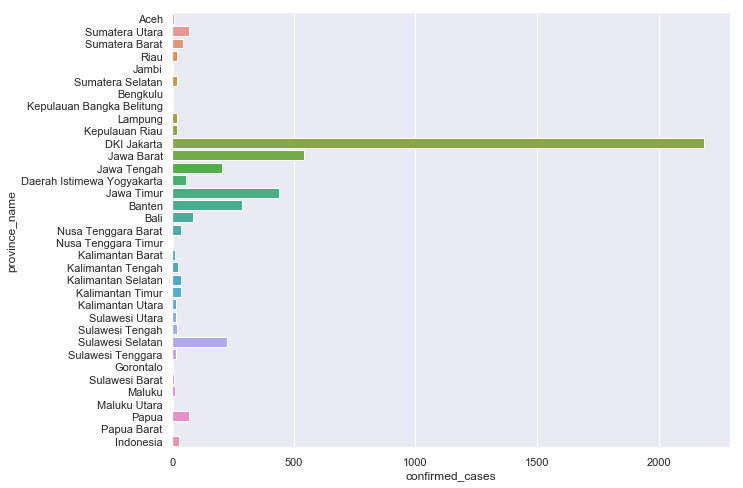

In [23]:
# Menampilkan banyaknya kasus yang terkonfirmasi di setiap provinsi 
plt.figure(figsize=(10,8))
p=sns.barplot(x='confirmed_cases', y='province_name',data=cov_prov)

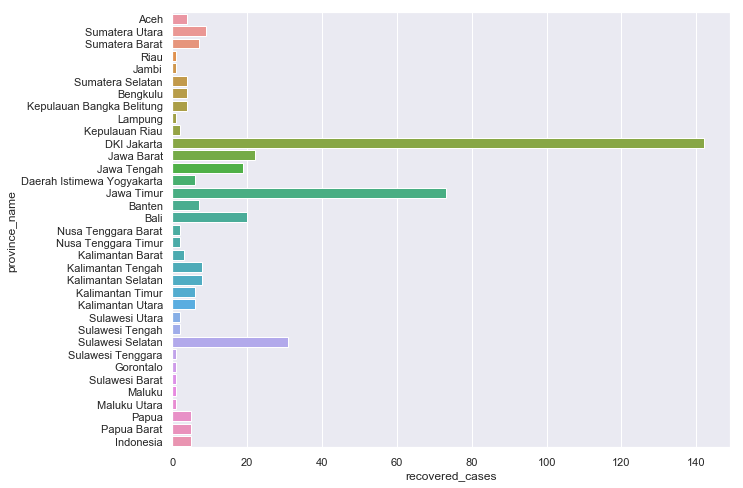

In [24]:
#Menampilkan kasus pasien yang sembuh di setiap provinsi
plt.figure(figsize=(10,8))
p=sns.barplot(x='recovered_cases', y='province_name',data=cov_prov)

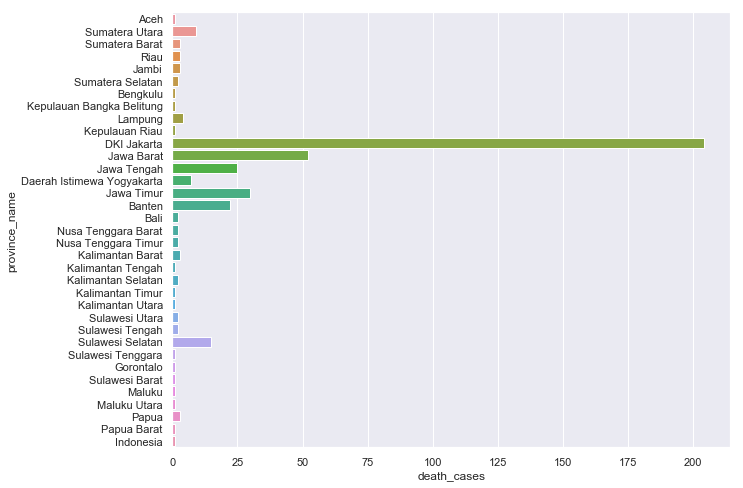

In [25]:
#Menampilkan kasus pasien yang meninggal dunia akibat covid-19 di setiap provinsi
plt.figure(figsize=(10,8))
p=sns.barplot(x='death_cases', y='province_name',data=cov_prov)

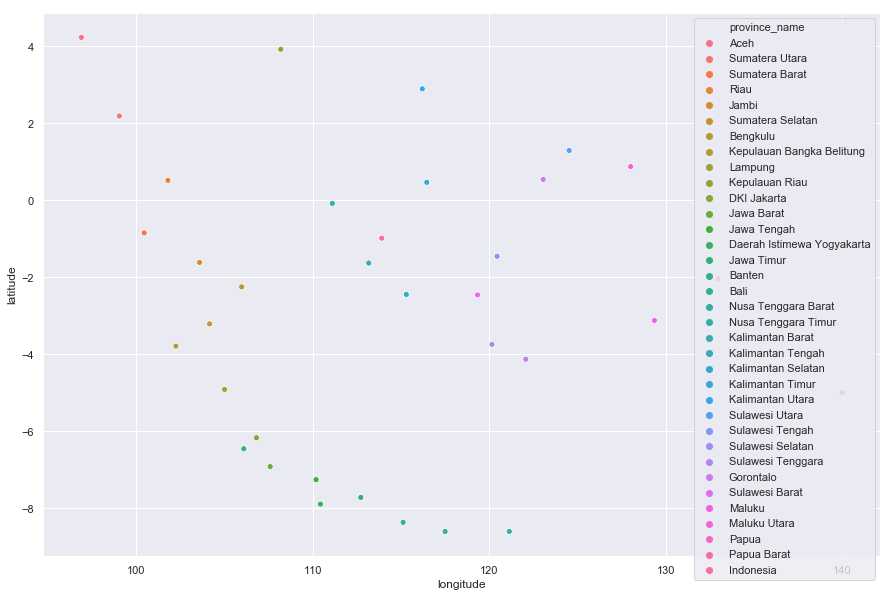

In [31]:
#Menampilkan persebaran kasus covid-19 berdasarkan letak astronomis setiap provinsi
plt.figure(figsize=(15,10))
p=sns.scatterplot(x='longitude', y='latitude',hue='province_name', data=cov_prov)

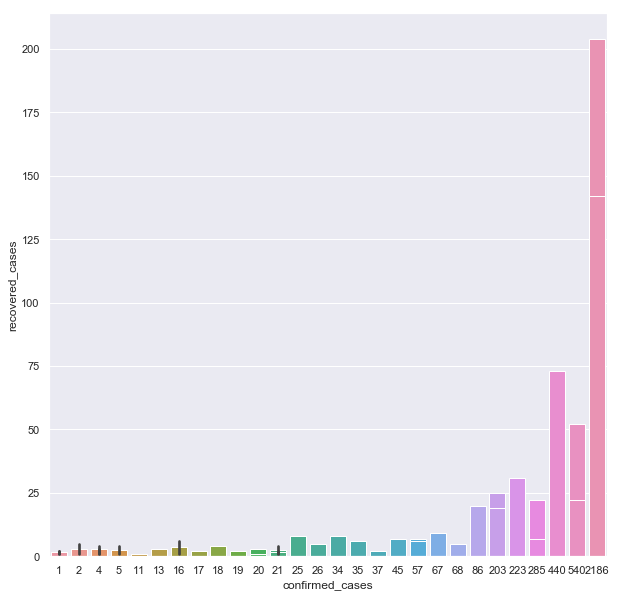

In [7]:
plt.figure(figsize=(10,10))
p = sns.barplot(x='confirmed_cases', y= 'death_cases', data=cov_prov)
p = sns.barplot(x='confirmed_cases', y= 'recovered_cases', data=cov_prov);

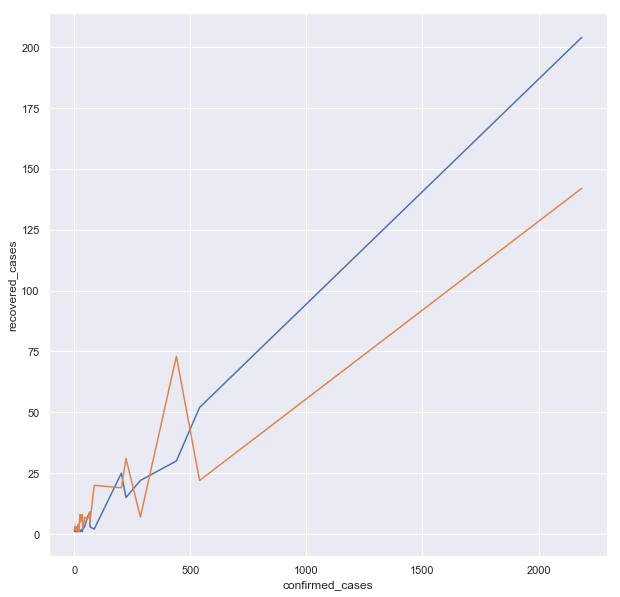

In [8]:
plt.figure(figsize=(10,10))
p = sns.lineplot(x='confirmed_cases', y= 'death_cases', data=cov_prov)
p = sns.lineplot(x='confirmed_cases', y= 'recovered_cases', data=cov_prov);

Dari model diatas dapat disimpulkan bahwa lokasi yang paling banyak terkena virus corona adalah daerah pada pulau jawa tepatnya di Jakarta, Banten, Jawa Barat, Jawa Timur , Jawa Tengah dan Daerah Istimewa Yogyakarta, dari banyaknya kasus yang terkonfirmasi ternyata ada suatu daerah yang memiliki laju kematian lebih banyak dibandingkan laju kesembuhannya sebagai contoh adalah DKI Jakarta dari 1753 kasus yang terjadi ada 82 kasus sembuh dan 154 kasus kematian. Karena di DKI Jakarta terdapat kasus yang terkonfirmasi positif, maka ada baiknya pemerintah melakukan pembatasan sosial agar virus tidak menyebar ke daerah sekitarnya (Banten dan Jawa Barat).